In [5]:
import numpy as np
from PIL import Image, ImageDraw
 
from google.colab import output
!pip install ipyplot
import ipyplot
output.clear()

ModuleNotFoundError: No module named 'PIL'

In [6]:
#------------------------------
# GENERIC
#------------------------------
images = []
labels = []
 
# solid color
mode = 'RGBA'
size = (256, 256)
color = (200,10,130,255)
img = Image.new(mode, size, color=color)
images.append(img)
labels.append('solid color')
 
# mandelbrot
extent = (-3,-2,2,2)
quality = 50
img = Image.effect_mandelbrot(size, extent, quality)
images.append(img)
labels.append('mandelbrot')
 
# random noise
imarray = np.random.rand(256,256,3) * 255
img = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
images.append(img)
labels.append('random noise')
 
# changing pixels values
color = (255,10,25,200)
img = Image.new(mode, size, color)
pixels = img.load()
 
for i in range(img.size[0]):       
  for j in range(img.size[1]):
    if i >= 100: 
      pixels[i,j] = (267, 45, 25) 
    else:
      pixels[i,j] = (67, 5, 255) 
images.append(img)
labels.append('pixels values')
 
# lines drawing
color = (0,0,0)
img2 = Image.new(mode, size, color)
drawer = ImageDraw.Draw(img2)  
for _ in range(10):
  p1 = (size[0] * np.random.random(), size[1] * np.random.random())
  p2 = (size[0] * np.random.random(), size[1] * np.random.random())
  drawer.line([p1, p2])
images.append(img2)
labels.append('drawing lines')
 
ipyplot.plot_images(images, labels)

NameError: name 'Image' is not defined

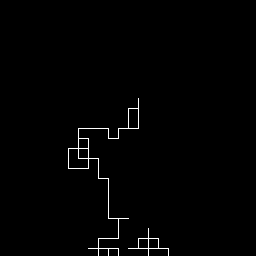

In [ ]:
#------------------------------
# RANDOM WALKS
#------------------------------
import numpy as np
from PIL import Image, ImageDraw
  
size = (256, 256)
pos = (size[0]/2, size[1]/2)
unit = 10 # size of movement 
steps = 10000
img = Image.new("RGB", size)
  
drawer = ImageDraw.Draw(img)  
for _ in range(steps):
  c = np.random.choice([0,1,2,3])
  if c==0:
    new_pos = (pos[0]+unit, pos[1])
  if c==1:
    new_pos = (pos[0]-unit, pos[1])
  if c==2:
    new_pos = (pos[0], pos[1]+unit)
  if c==3:
    new_pos = (pos[0], pos[1]-unit)
  drawer.line([pos, new_pos])
  r = np.random.random()
  pos = new_pos #if r < 0.9 else (size[0]/2, size[1]/2)
img

In [7]:
#------------------------------
# PIXEL GRID
#------------------------------

images = []
labels = []

def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def pixelgrid(size, unit, cmap, dpi=100, noise='none', noise_value=100):
   w, h = size
   rows = int(w / unit)   
   cols = int(h / unit)
   img = Image.new('RGB', size)
 
   pixels = img.load()

   
 
   for r in range(rows):
      for c in range(cols):         
         rr, rc = r*unit, c*unit    

         points = points = [(int(rr - np.random.random()*r), int(rc - np.random.random()*h)) for _ in range(noise_value)]

         for x in range(rr,rr+unit):
            for y in range(rc, rc+unit):            
               re, bl, gr = cmap[r,c]
               if noise == 'gaussian':
                  re += np.random.normal(1)*noise_value
                  bl += np.random.normal(1)*noise_value
                  gr += np.random.normal(1)*noise_value

               if noise == 'cellular':
                  min_dist_arr = []
                  for p in points:
                    min_dist_arr.append(distance(p[0], p[1], x, y))
    
                    dist = np.min(min_dist_arr)
                   
                    re -= dist
                    bl -= dist
                    gr -= dist
                  
                  pixels[x,y] = int(re), int(bl), int(gr)
               #pixels[x,y] = int(re), int(bl), int(gr)
                
                  
   return img
 
size = (256, 256)
w, h = size
unit = 32
rows, cols = int(w/unit), int(h/unit)

# random pixel grid
colors = np.ndarray(shape=(rows, cols,3), dtype=int)
for x in range(rows):
  for y in range(cols):
     r = int(np.random.random()*255)
     b = int(np.random.random()*255)
     g = int(np.random.random()*255)    
     colors[x,y] = (r,g,b)

img = pixelgrid(size, unit, colors)
images.append(img)
labels.append('random pixel grid')

# chess board
colors = np.ndarray(shape=(rows, cols,3), dtype=int)
for x in range(rows):
   for y in range(cols):
      if ((x+y)%2):
         colors[x,y] = [50,230,100]
      else:
         colors[x,y] = [200,36,255]

img = pixelgrid(size, unit, colors)
images.append(img)
labels.append('chess board')

ipyplot.plot_images(images, labels)

NameError: name 'np' is not defined


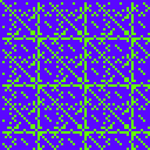
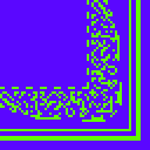


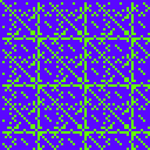
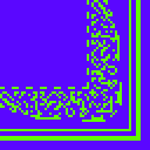

In [ ]:
#------------------------------
# CMAP MODULO EXPERIMENT
#------------------------------
images = []
labels = []

size = (256,256)
unit = 4
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
# (x**y - y**x)%5
colors = np.ndarray(shape=(rows, cols,3))
for x in range(rows):
   for y in range(cols):
      if (x**y - y**x)%5:
         colors[x,y] = colors[y,x] = (90,7,255)
      else:
         colors[x,y] = colors[y,x] = (98,255,0)
 
img = pixelgrid(size, unit, colors)
images.append(img)
labels.append('(x**y - y**x)%5')

# (x**2*y**2 - np.exp(x))%3
colors = np.ndarray(shape=(rows, cols,3))
for x in range(rows):
   for y in range(cols):
      if (x**2*y**2 - np.exp(x))%3:
         colors[x,y] = colors[y,x] = (90,7,255)
      else:
         colors[x,y] = colors[y,x] = (98,255,0)
 
img = pixelgrid(size, unit, colors)
images.append(img)
labels.append('(x**2*y**2 - np.exp(x))%3')

ipyplot.plot_images(images, labels)

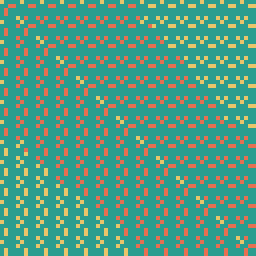

In [ ]:
#------------------------------
# CMAP MODULO EXP 3 COLORS 
#------------------------------
size = (256,256)
unit = 4
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
colors = np.ndarray(shape=(rows, cols,3))
for x in range(rows):
   for y in range(cols):
      if (x**2 + y)%5:
        colors[x,y] = colors[y,x] = (42, 157, 143)
      elif (x*y*np.exp(x-y) + y**2)%2: # also np.exp(x*y)
        colors[x,y] = colors[y,x] = (231, 111, 81)
      else:
        colors[x,y] = colors[y,x] = (233, 196, 106)
 
img = pixelgrid(size, unit, colors)
img

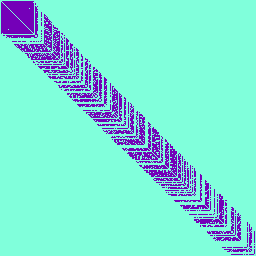

In [ ]:
#------------------------------
# CMAP CONSTRAINTS NO GRID
#------------------------------
size = (256,256)

img = Image.new('RGB', size)
pixels = img.load()

def cond1(x,y):
  return (x**2 + y**2 - np.exp(x) - np.exp(y))%5

def cond2(x,y):
  return (x*np.exp(x) + x**2)%3

def cond3(x,y):
  return (x*y*np.exp(x-y) + y**2)%2
  #return True#(x**2*y**2 - np.exp(x))%3

for x in range(img.size[0]):
  for y in range(img.size[1]):
  
      if cond1(x,y) and cond2(x,y) and cond3(x,y):
        pixels[x,y] = pixels[y,x] = (116, 0, 184)
      else:
        pixels[x,y] = pixels[y,x] = (128, 255, 219)
img

100%|██████████| 100000/100000 [00:01<00:00, 72783.13it/s]


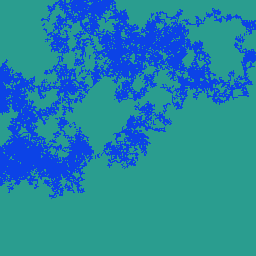

In [ ]:
#------------------------------
# WALKER ANT
#------------------------------

from tqdm import tqdm
size = (256,256)
unit = 1
w, h = size
rows = int(w / unit)
cols = int(h / unit)


start = [int(rows / 2), int(cols / 2)]
colors = np.ndarray(shape=(rows, cols,3))
pos = start

for x in range(rows):
   for y in range(cols):
        colors[x,y] = (42, 157, 143)
steps = 100000
for _ in tqdm(range(steps)):
  
  c = np.random.choice([0,1,2,3])
  if c==0:
    new_pos = [pos[0]+unit, pos[1]]
  if c==1:
    new_pos = [pos[0]-unit, pos[1]]
  if c==2:
    new_pos = [pos[0], pos[1]+unit]
  if c==3:
    new_pos = [pos[0], pos[1]-unit]

  if (new_pos[0] >= rows): new_pos[0] = rows-1
  if (new_pos[0] < 0): new_pos[0] = 0 
  if (new_pos[1] >= cols): new_pos[1] = cols-1
  if (new_pos[1] < 0): new_pos[1] = 0

  colors[pos[0]:new_pos[0], new_pos[1]] = (12, 67, 230)
  colors[pos[0], pos[1]:new_pos[1]] = (12, 67, 230)
  #colors[pos[0], pos[1]] = (12, 67, 230)
  
  pos = new_pos 
  steps +=1

img = pixelgrid(size, unit, colors)
img

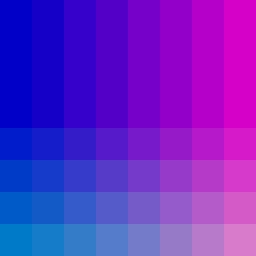

In [ ]:
#------------------------------
# FOCAL POINT (GRADIENT)
#------------------------------
size = (256,256)
unit = 32
w, h = size
rows = int(w / unit)
cols = int(h / unit)

p = [10,100]

start = [int(rows / 2), int(cols / 2)]
colors = np.ndarray(shape=(rows, cols,3))
pos = start

for x in range(rows):
  for y in range(cols):

      r = int( ((x*unit - p[0]) * 255 ) / w )
      g = int( ((y*unit - p[1]) * 255 ) / h )
      b = 200
      colors[x,y] = (r, g, b)

img = pixelgrid(size, unit, colors)
img

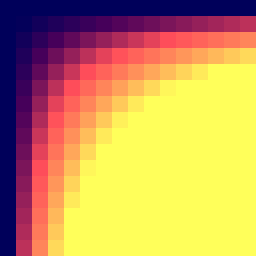

In [ ]:
#------------------------------
# EXPONENTIAL GRADIENT
#------------------------------

from tqdm import tqdm
size = (256,256)
unit = 16
w, h = size
rows = int(w / unit)
cols = int(h / unit)

p = [10,100]
a,b,c = 210,200,90

colors = np.ndarray(shape=(rows, cols,3))

for x in range(rows):
  for y in range(cols):
    
    r = int( ((x*y*unit - p[0]) * a ) / w )
    g = int( ((x*y*unit - p[1]) * b ) / h )
    b = c
    colors[x,y] = (r, g, b)

img = pixelgrid(size, unit, colors)
img

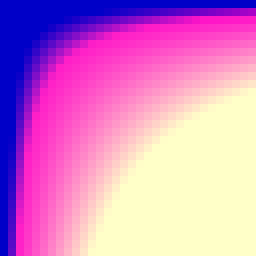

In [ ]:
#------------------------------
# EXPONENTIAL GRADIENT
#------------------------------

from tqdm import tqdm
size = (256,256)
unit = 8
w, h = size
rows = int(w / unit)
cols = int(h / unit)

p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))

def gradfun_r(x,y):
  return x*y + x*y / np.exp(y)

def gradfun_g(x,y):
  return x*y - x*y / np.exp(y)

for x in range(rows):
  for y in range(cols):

    r = int( ((gradfun_r(x,y) * unit - p[0]) * 205 ) / w )
    g = int( ((gradfun_g(x,y) * unit - p[1]) * 25 ) / h )
    b = 200
    colors[x,y] = (r, g, b)

img = pixelgrid(size, unit, colors)
img

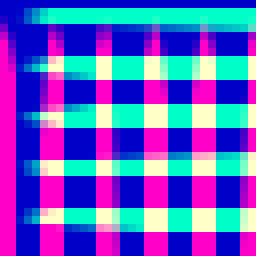

In [ ]:
#------------------------------
# SINUSOID GRADIENT
#------------------------------
size = (256,256)
unit = 8
w, h = size
rows = int(w / unit)
cols = int(h / unit)

p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))

for x in range(rows): 
  for y in range(cols):

    r = int( ((np.cos(x) * y * 10 * unit - p[0]) * 255 ) / w)
    g = int( ((np.sin(y) * x * 10 * unit - p[1]) * 255 ) / h)
    b = 200
    colors[x,y] = (r, g, b)

img = pixelgrid(size, unit, colors)
img

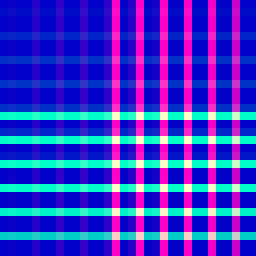

In [ ]:
#------------------------------
# SINUSOID GRADIENT
#------------------------------
size = (256,256)
unit = 8
w, h = size
rows = int(w / unit)
cols = int(h / unit)

p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))

for x in range(rows): 
  for y in range(cols):

    r = (np.tan(x) * x * 255 * unit - p[0]) / w
    g = (np.tan(y) * y * 255 * unit - p[1]) / h 
    b = 200
    colors[x,y] = (r, g, b)

img = pixelgrid(size, unit, colors)
img

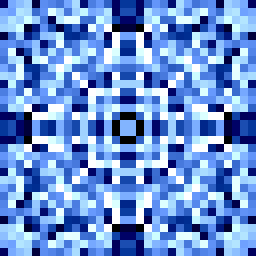

In [ ]:
#------------------------------
# GAUSSIAN EXPERIMENTS
#------------------------------
size = (256, 256)
unit = 8
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))
 
for x in range(rows): 
  for y in range(cols):
 
    r = np.random.normal(1)*105
    g = r + 50
    b = g + 100
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)
 
 
img = pixelgrid(size, unit, colors)
img

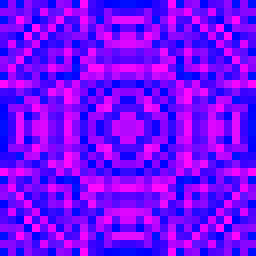

In [ ]:
#------------------------------
# GAUSSIAN EXPERIMENTS
#------------------------------
size = (256, 256)
unit = 8
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))

k,j,z = 100, 5, 255
 
for x in range(rows): 
  for y in range(cols):
 
    r = np.random.normal(1)* k
    g = np.random.normal(1)* j
    b = 255
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)
 
 
img = pixelgrid(size, unit, colors)
img

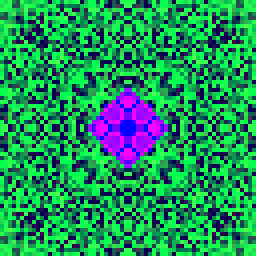

In [ ]:
#------------------------------
# VIOLET FLOWER
#------------------------------
size = (256, 256)
unit = 4
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
p = [int(w/2),int(h/2)]

colors = np.ndarray(shape=(rows, cols,3))

k,j,z = 100, 5, 255
span = 1 / unit * 144 + 1
 
for x in range(rows): 
  for y in range(cols):

    if x**2 + y**2 > span**2 + span**2:
      r = np.random.normal(1)* 20
      g = np.random.normal(1)* 170
      b = 80
    else:
      r = np.random.normal(1)* k
      g = np.random.normal(1)* j
      b = 255
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)
 
 
img = pixelgrid(size, unit, colors)
img

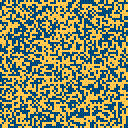

In [ ]:
#------------------------------
# CELLULAR AUTOMATON
#------------------------------
size = (128, 128)
unit = 2
w, h = size
rows = int(w / unit)
cols = int(h / unit)
 
p = [int(w/2),int(h/2)]
colors = np.ndarray(shape=(rows, cols,3))

# cellular automaton matrix
ca = np.zeros(shape=(rows, cols))

def neighbours(x, y, ca, depth=1):
  rows, cols = len(ca), len(ca[0])
  num = 0
  if x < rows - 1:
    if ca[x+1, y]: num += 1
  if x > 0:
    if ca[x-1, y]: num += 1
  if y < cols - 1:
    if ca[x, y+1]: num += 1
  if y > 0:
    if ca[x, y-1]: num += 1

  if x < rows-1 and y < cols-1:
    if ca[x+1, y+1]: num += 1
  if x < rows-1 and y > 0:
    if ca[x+1, y-1]: num += 1
  if x > 0 and y < cols-1:
    if ca[x-1, y+1]: num += 1
  if x > 0 and y > 0:
    if ca[x-1, y-1]: num += 1
  return num

def rule1(ca):
  rows, cols = len(ca), len(ca[0])
  new_ca = np.zeros(shape=(rows, cols))

  for r in range(rows):
    for c in range(cols):
      n = neighbours(r,c,ca)
      if ca[r,c] == 1:
        if n < 2:
          new_ca[r,c] = 0
        elif n >= 2 and n <= 3:
          new_ca[r,c] = 1
        else:
          new_ca[r,c] = 0
      else:
        if n==3:
          new_ca[r,c] = 1
  return new_ca

def random_fill(ca, p=0.3):
  rows, cols = len(ca), len(ca[0])
  new_ca = np.zeros(shape=(rows, cols))

  for r in range(rows):
    for c in range(cols):
      if np.random.random() < p:
        ca[r,c] = 1

from tqdm import tqdm
import io
from IPython import display

imgs = []
steps = 100

# colors
c1 = (1, 73, 124)
c2 = (249, 199, 79)

random_fill(ca, p=0.5)
for _ in tqdm(range(steps)):
  for x in range(rows): 
    for y in range(cols):
      colors[x,y] = c1 if ca[x,y] == 1 else c2
  img = pixelgrid(size, unit, colors)
  imgs.append(img)
  ca = rule1(ca)

out = io.BytesIO()
imgs[0].save(out, format='GIF', save_all=True, append_images=imgs[1:], optimize=False, duration=40, loop=0)
imgs[0].save('ca.gif', save_all=True, append_images=imgs[1:], optimize=False, duration=500, loop=0)
output.clear()
display.Image(data=out.getvalue(), format='png')

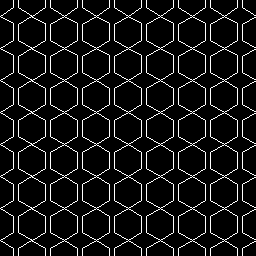

In [ ]:
#------------------------------
# HEXAGONAL GRID
#------------------------------
size = (256, 256)
w, h = size
unit = 4

rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
drawer = ImageDraw.Draw(img)

def pointy_hex_corner(center, size, i):
    x, y = center
    angle_deg = 60 * i - 30
    angle_rad = np.pi / 180 * angle_deg
    return x + size * np.cos(angle_rad), y + size * np.sin(angle_rad)

for x in range(rows):
  for y in range(cols):
    center = (x * 32, y * 32)
    for i in range(0,6):
      p1 = pointy_hex_corner(center, 16, i)
      p2 = pointy_hex_corner(center, 16, i+1)
      drawer.line([p1, p2])
img



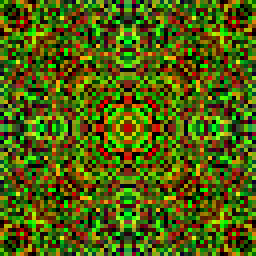

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 4
rows = int(w / unit)
cols = int(h / unit)
np.random.seed(seed=2)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

center = (128, 128)
for x in range(rows):
  for y in range(cols):
    r = np.random.normal(1)* np.abs(x - center[0])
    g = np.random.normal(1)* np.abs(y - center[1])
    b = np.random.normal(1)* np.abs(x - y)
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)


img = pixelgrid(size, unit, colors)    
img

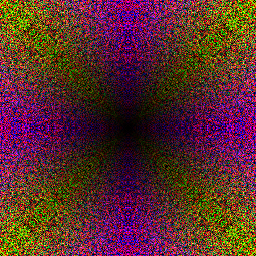

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 1
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))


center = (128, 128)
for x in range(rows):
  for y in range(cols):
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1])) * 1
    #print(f'r:{r},g:{g},b:{b}')
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)


img = pixelgrid(size, unit, colors)    
img

In [ ]:
def normalize_squared_colors(c, smin=0, smax=255):
  max_r, max_g, max_b = 0, 0, 0
  min_r, min_g, min_b = 0, 0, 0
  for x in range(len(c)):
    for y in range(len(c[0])):
      max_r = c[x][y][0] if c[x][y][0] > max_r else max_r 
      max_g = c[x][y][1] if c[x][y][1] > max_g else max_g 
      max_b = c[x][y][2] if c[x][y][2] > max_b else max_b 

      min_r = c[x][y][0] if c[x][y][0] < min_r else min_r 
      min_g = c[x][y][1] if c[x][y][1] < min_g else min_g 
      min_b = c[x][y][2] if c[x][y][2] < min_b else min_b

  for x in range(len(c)):
    for y in range(len(c[0])):
      c[x][y][0] = ( c[x][y][0]  - min_r ) * (smax - smin) / ( max_r - min_r ) + smin
      c[x][y][1] = ( c[x][y][1]  - min_g ) * (smax - smin) / ( max_g - min_g ) + smin
      c[x][y][2] = ( c[x][y][2]  - min_b ) * (smax - smin) / ( max_b - min_b ) + smin
  
  return c

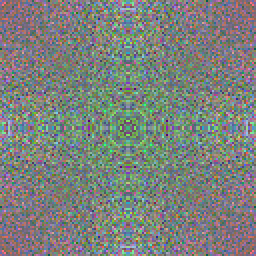

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 2
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

center = (1, 128)
for x in range(rows):
  for y in range(cols):
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1]))
    #print(f'r:{r},g:{g},b:{b}')
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)
colors = normalize_squared_colors(colors)

img = pixelgrid(size, unit, colors)    
img

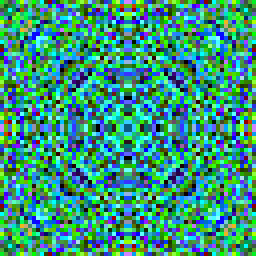

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 4
rows = int(w / unit)
cols = int(h / unit)

np.random.seed(seed=12)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

center = (1, 128)
for x in range(rows):
  for y in range(cols):

    # color
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1]))

    #if np.exp(x) < 0.5:
    #if np.sin(x) < 0.5:
    if np.tan(x) * np.sin(y) < 0.7:
      r = r 
      g = 255-g
      b = 255-b

    # caleidoscope fill 
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)
#colors = normalize_squared_colors(colors)

img = pixelgrid(size, unit, colors)    
img

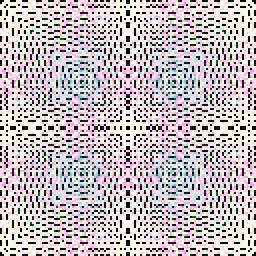

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 2
rows = int(w / unit)
cols = int(h / unit)

np.random.seed(seed=1234)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

center = (128, 128)
for x in range(rows):
  for y in range(cols):

    # color
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = 25 #np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1]))

    #if np.exp(x) < 0.5:
    #if np.sin(x) < 0.5:
    if np.tan(x) * np.sin(y) < 0.7:
      r = 255-r 
      g = 255-g
      b = 255-b

    # 4 reflection caleidoscope
    x_arr = [x,rows-x-1, rows-int(x/2)-1, int(x/2)]#, int(x/4), rows-int(x/4)-1]
    y_arr = [y,cols-y-1, cols-int(y/2)-1, int(y/2)]#, int(y/4), cols-int(y/4)-1]
    for xe in x_arr:
      for ye in y_arr:
        colors[xe, ye] = colors[ye, xe] = (r,g,b)
    
#colors = normalize_squared_colors(colors)

img = pixelgrid(size, unit, colors)    
img

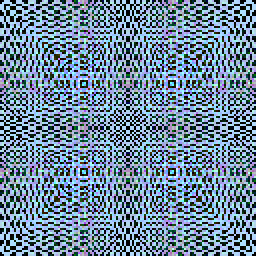

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 2
rows = int(w / unit)
cols = int(h / unit)

np.random.seed(seed=1234)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))


center = (128, 128)
for x in range(rows):
  for y in range(cols):

    # color
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1]))

    #if np.exp(x) < 0.5:
    #if np.sin(x) < 0.5:
    if np.tan(x) * np.sin(y) < 0.2:
      r = 180-r 
      g = 225-g
      b = 255-b

    # 4 reflection caleidoscope
    x_arr = [x,rows-x-1, rows-int(x/2)-1, int(x/2)]#, int(x/4), rows-int(x/4)-1]
    y_arr = [y,cols-y-1, cols-int(y/2)-1, int(y/2)]#, int(y/4), cols-int(y/4)-1]
    for xe in x_arr:
      for ye in y_arr:
        colors[xe, ye] = colors[ye, xe] = (r,g,b)
    
#colors = normalize_squared_colors(colors)

img = pixelgrid(size, unit, colors, dpi=1000)    
img

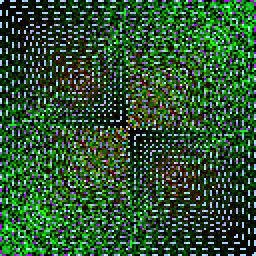

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 2
rows = int(w / unit)
cols = int(h / unit)

np.random.seed(seed=1234)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))


center = (128, 128)
for x in range(rows):
  for y in range(cols):

    # color
    r = np.random.normal(1) * np.abs(x - center[0]) 
    g = np.random.normal(1) * np.abs(y - center[1])  
    b = 0#np.random.normal(1) * np.abs( (x - center[0]) - (y - center[1]))

    #if np.exp(x) < 0.5:
    #if np.sin(x) < 0.5:
    if np.tan(x) * np.sin(y) > 0.99:
      r = 180-r 
      g = 225-g
      b = 255-b

    # 4 reflection caleidoscope
    x_arr = [x,rows-x-1, rows-int(x/2)-1, int(x/2)]#, int(x/4), rows-int(x/4)-1]
    y_arr = [y,cols-y-1, cols-int(y/2)-1, int(y/2)]#, int(y/4), cols-int(y/4)-1]
    for xe, ye in zip(x_arr, y_arr):
        colors[xe, ye] = colors[ye, xe] = (r,g,b)
    
#colors = normalize_squared_colors(colors)

img = pixelgrid(size, unit, colors, dpi=100)    
img

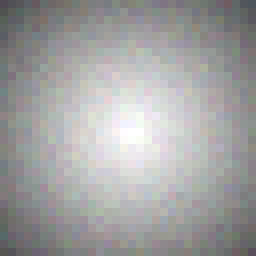

In [ ]:
#------------------------------
# Experiment TV SCREEN
#------------------------------
size = (256, 256)
w, h = size
unit = 8
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

center = ( int(w / (unit*2) ), int(h / (unit*2) ) )
xc, yc = center
center_color = (255,255,255)
max_dist = distance(0, 0, rows, cols)
r,g,b = 0,0,0
for x in range(rows):
  for y in range(cols):
    dist = distance(xc, yc, x, y)
    r = center_color[0] - dist*unit + np.random.normal(1)*5
    g = center_color[1] - dist*unit + np.random.normal(1)*5
    b = center_color[2] - dist*unit + np.random.normal(1)*5

    colors[x,y] = (r,g,b)


img = pixelgrid(size, unit, colors)    
img

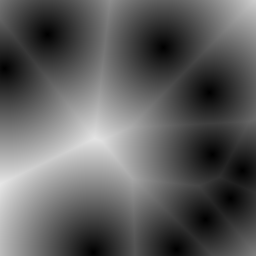

In [ ]:
#------------------------------
# CELLULAR NOISE
#------------------------------
size = (256, 256)
w, h = size
unit = 1
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

points = [(int(np.random.random()*w), int(np.random.random()*h)) for _ in range(10)]

max_dist = distance(0, 0, rows, cols)
r,g,b = 0,0,0
for x in range(rows):
  for y in range(cols):
    min_dist_arr = []
    for p in points:
      min_dist_arr.append(distance(p[0], p[1], x, y))
    
    dist = np.min(min_dist_arr) 
    r = dist*2
    g = dist*2
    b = dist*2

    colors[x,y] = (r,g,b)


img = pixelgrid(size, unit, colors)    
img

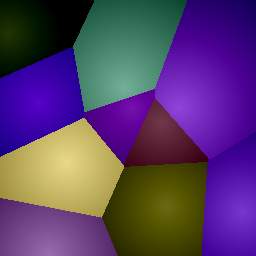

In [ ]:
#------------------------------
# CELLULAR NOISE
#------------------------------
size = (256, 256)
w, h = size
unit = 1
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

max_dist = int(w * np.sqrt(2))

def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

points = [(int(np.random.random()*w), int(np.random.random()*h)) for _ in range(10)]
point_color = {}
for p in points:
  point_color[p] = {}
  point_color[p]['r'] = np.random.random()*255
  point_color[p]['g'] = np.random.random()*255
  point_color[p]['b'] = np.random.random()*255

max_dist = distance(0, 0, rows, cols)
r,g,b = 0,0,0
for x in range(rows):
  for y in range(cols):
    min_dist_arr = []
    for p in points:
      min_dist_arr.append(distance(p[0], p[1], x, y))
    
    dist = np.min(min_dist_arr)
    color = point_color[points[min_dist_arr.index(dist)]]

    r = color['r'] - dist
    g = color['g'] - dist
    b = color['b'] - dist

    colors[x,y] = (r,g,b)


img = pixelgrid(size, unit, colors)    
img

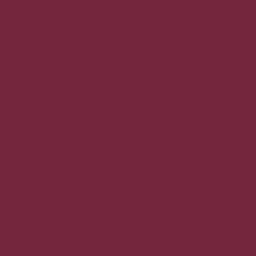

In [ ]:
#------------------------------
# CELLULAR NOISE
#------------------------------
size = (256, 256)
w, h = size
unit = 1
rows = int(w / unit)
cols = int(h / unit)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

def distance(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

p = [0,0]

for x in range(rows):

  for y in range(cols):
    
    dist = distance(p[0], p[1], x, y)

    colors[x,y] = (r,g,b)

  
img = pixelgrid(size, unit, colors, noise='none')    
img

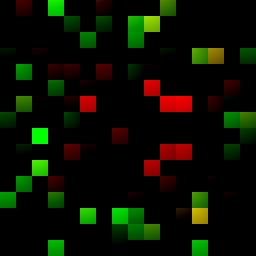

In [ ]:
#------------------------------
# Experiment
#------------------------------
size = (256, 256)
w, h = size
unit = 16
rows = int(w / unit)
cols = int(h / unit)
np.random.seed(seed=2)

img = Image.new('RGB', size, (0,0,0))
pixels = img.load()
colors = np.ndarray(shape=(rows, cols,3))

center = (128, 128)
for x in range(rows):
  for y in range(cols):
    r = np.random.normal(1)* np.abs(x - center[0])
    g = np.random.normal(1)* np.abs(y - center[1])
    b = np.random.normal(1)* np.abs(x - y)
    colors[x,y] = colors[cols-y-1,rows-x-1] = (r,g,b)
    colors[y,x] = colors[rows-x-1,cols-y-1] = (r,g,b)
    colors[rows-x-1, y] = colors[x, cols-y-1] = (r,g,b)
    colors[y, rows-x-1] = colors[cols-y-1, x] = (r,g,b)


img = pixelgrid(size, unit, colors, noise='cellular', noise_value=3)    
img